(array([5., 3.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


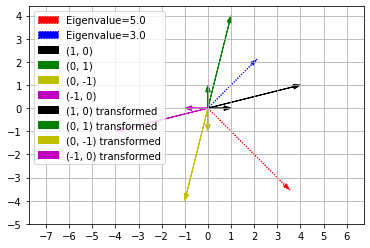

In [46]:
import numpy as np
A = np.array([[4,1],[1,4]])
A_eigens = np.linalg.eig(A)
print(A_eigens)
%matplotlib inline
import matplotlib.pyplot as plt
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], 
                     vector2d[0], vector2d[1],
                     head_width=0.2, head_length=0.3, 
                     length_includes_head=True,**options)

vector_original_1 = np.array([[1],[0]])
vector_original_2 = np.array([[0],[1]])
vector_original_3 = np.array([[0],[-1]])
vector_original_4 = np.array([[-1],[0]])

vector_transformed_1 = np.matmul(A,vector_original_1).T[0]
vector_transformed_2 = np.matmul(A,vector_original_2).T[0]
vector_transformed_3 = np.matmul(A,vector_original_3).T[0]
vector_transformed_4 = A.dot(vector_original_4).T[0]

plot_vector2d(A_eigens[1][0]*A_eigens[0][0], color="r", label=f"Eigenvalue={A_eigens[0][0]}", linestyle="dotted")
plot_vector2d(A_eigens[1][1]*A_eigens[0][1], color="b", label=f"Eigenvalue={A_eigens[0][1]}", linestyle="dotted")

plot_vector2d(vector_original_1.T[0], color="k", label="(1, 0)")
plot_vector2d(vector_original_2.T[0], color="g", label="(0, 1)")
plot_vector2d(vector_original_3.T[0], color="y", label="(0, -1)")
plot_vector2d(vector_original_4.T[0], color="m", label="(-1, 0)")

plot_vector2d(vector_transformed_1, color="k", label="(1, 0) transformed")
plot_vector2d(vector_transformed_2, color="g", label="(0, 1) transformed")
plot_vector2d(vector_transformed_3, color="y", label="(0, -1) transformed")
plot_vector2d(vector_transformed_4, color="m", label="(-1, 0) transformed")
# plt.axis([-10, 10, -10, 10])
plt.axis('equal')
x_ticks = np.arange(-8, 8, 1)
y_ticks = np.arange(-5, 5, 1)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
# plt.grid(axis='x', linewidth=1, linestyle='--', color='0.75')
# plt.grid(axis='y', linewidth=1, linestyle='--', color='0.75')
plt.legend()
plt.grid()
# plt.show()
plt.savefig('Fig_01.png', dpi=300)

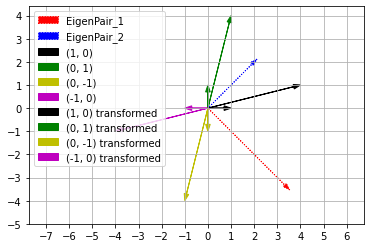